<a href="https://colab.research.google.com/github/Kunalpanigrahi03/Kunalpanigrahi03/blob/main/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and Analysis

In [ ]:
#loading the data from csv file to Pandas DataFrame
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [ ]:
#first 5 rows of dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#number of rows and columns
insurance_dataset.shape

(1338, 7)

In [ ]:
#getting some info from dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features

*   Sex
*   Smoker
*   Region


In [ ]:
#check for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [ ]:
#statiscal measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

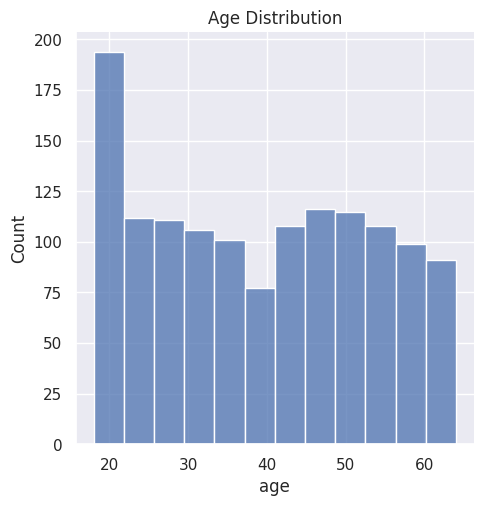

In [ ]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

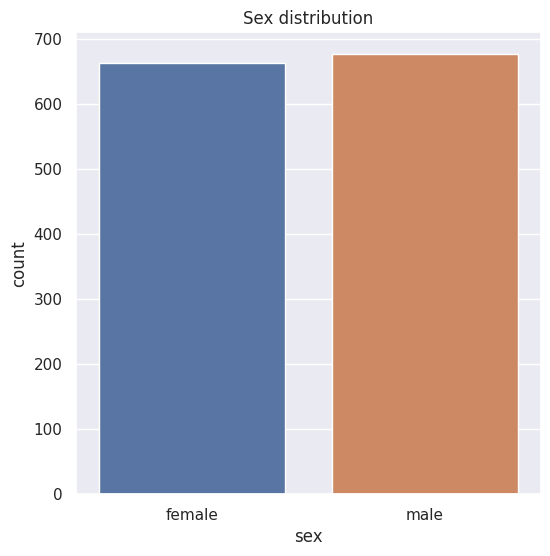

In [ ]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data = insurance_dataset)
plt.title('Sex distribution')
plt.show()

In [ ]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 600x600 with 0 Axes>

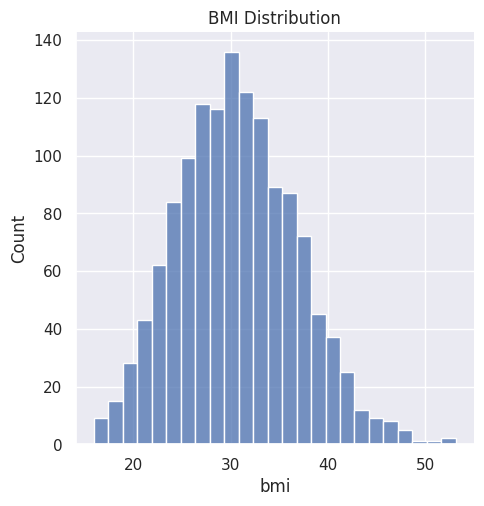

In [ ]:
#bmi distribution
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI range -> 18.5 to 24.9

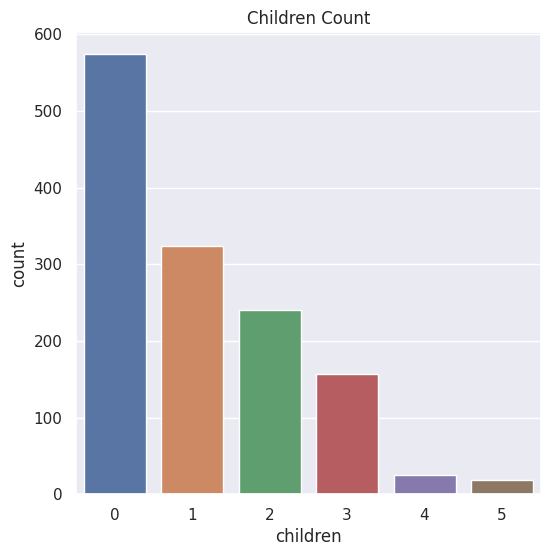

In [ ]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children Count')
plt.show()

In [ ]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

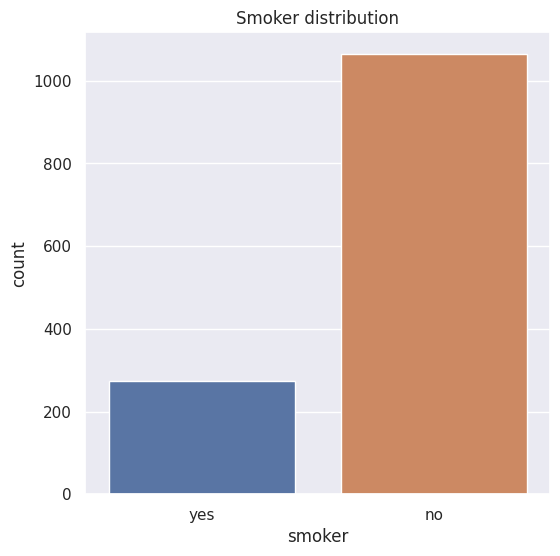

In [ ]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data = insurance_dataset)
plt.title('Smoker distribution')
plt.show()

In [ ]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

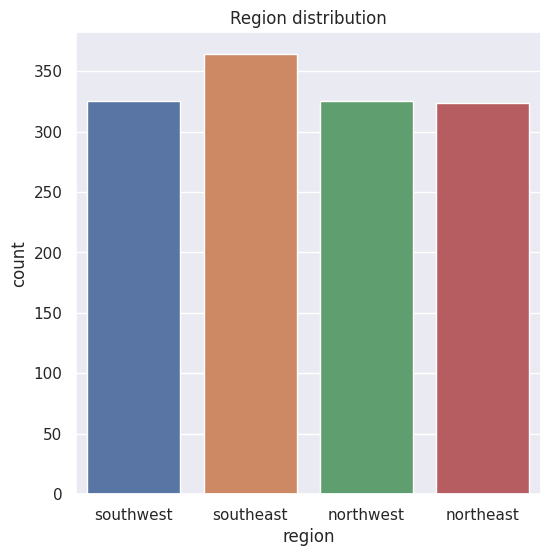

In [ ]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data = insurance_dataset)
plt.title('Region distribution')
plt.show()

In [ ]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 600x600 with 0 Axes>

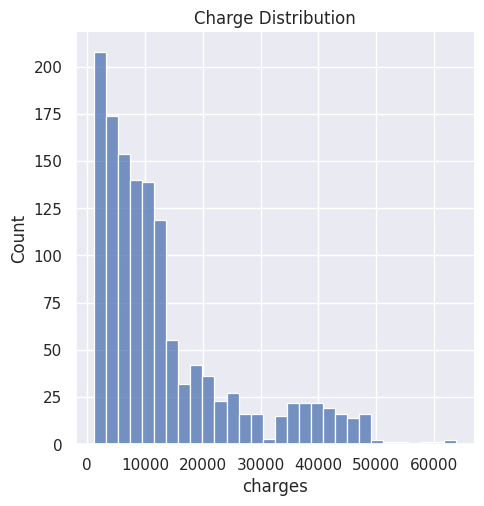

In [ ]:
#Charges distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('Charge Distribution')
plt.show()

Data Pre-Processing

Encoding the categorical features

In [ ]:
#encoding sex column
insurance_dataset.replace({'sex':{'male':0 , 'female' : 1}},inplace=True)

#encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0 , 'no' : 1}},inplace=True)

#encoding Region Column
insurance_dataset.replace({'region':{'southeast':0 , 'southwest' : 1, 'northeast' : 2, 'northwest' : 3}}, inplace=True)

Splitting the Features and Targets


In [ ]:
X = insurance_dataset.drop(columns='charges', axis = 1)
Y = insurance_dataset['charges']
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training data & Testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [ ]:
print(X_test)
print(X_train)

      age  sex     bmi  children  smoker  region
17     23    0  23.845         0       1       2
1091   55    1  29.830         0       1       2
273    50    0  27.455         1       1       2
270    18    0  29.370         1       1       0
874    44    0  21.850         3       1       2
...   ...  ...     ...       ...     ...     ...
232    19    1  17.800         0       1       1
323    57    0  40.945         0       1       2
1337   61    1  29.070         0       0       3
1066   48    0  37.290         2       1       0
966    51    0  24.795         2       0       3

[268 rows x 6 columns]
      age  sex     bmi  children  smoker  region
882    21    1  22.135         0       1       2
505    37    0  30.875         3       1       3
798    58    1  33.100         0       1       1
792    22    1  23.180         0       1       2
201    48    1  32.230         1       1       0
...   ...  ...     ...       ...     ...     ...
466    60    1  28.700         1       1     

Model Training

Linear Regression Model

In [ ]:
#loading the Linear regression model
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train.values, Y_train.values)

LinearRegression()

Model Evaluation

In [ ]:
#prediction on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('r squared value : ', r2_train)

r squared value :  0.751505643411174


In [ ]:
#prediction on testing data
testing_data_prediction = regressor.predict(X_test)

In [ ]:
# R squared value
r2_test = metrics.r2_score(Y_test, testing_data_prediction)
print('r squared value : ', r2_test)

r squared value :  0.7447273869684076


TO BUILD A PREDICTIVE SYSTEM


In [ ]:
input_data = (31,1,25.74,0,1,0)

# changing input data (tuple) to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost in USD is', prediction[0])

[3760.0805765]
The insurance cost in USD is 3760.080576496057
